In [1]:
import random
import networkx as nx  #necessary packages are imported

In [2]:
import sys
print(sys.getrecursionlimit()) # for knowing current reccursion limit

1000


In [3]:
sys.setrecursionlimit(15000) #need to increase reccursion limit if you get maximum reccursion depth exceeded.

In [4]:
"""def helper(G,i,total_nodes,no_of_edges_to_be_linked):  
  if i==total_nodes:
    return G 
  total_degrees=0
  for node,val in G.degree():                                                          # AT FIRST TRIED TO IMPLEMENT MY RECCURSION LOGIC OF PREFERENTIAL ATTACHMENT BY PASSING GRAPH OBJECT AND CAME TO KNOW BY PASSING LIKE THAT 
                                                                                       # WE WILL GET NONE TYPE OBJECTS ARE NOT ITERABLE.
    total_degrees += val
  probabilities_of_all_nodes=[]
  for node,val in G.degree():
    probabilities_of_all_nodes.append(val/total_degrees)
  allnodes=list(G.nodes())
  weights = probabilities_of_all_nodes
  chance_of_next_nodes = random.choices(allnodes,weights,k=no_of_edges_to_be_linked)

  for node in chance_of_next_nodes:
    G.add_edge(i,node)

  return helper(G,i+1,total_nodes,no_of_edges_to_be_linked)"""


'def helper(G,i,total_nodes,no_of_edges_to_be_linked):  \n  if i==total_nodes:\n    return G \n  total_degrees=0\n  for node,val in G.degree():                                                          # AT FIRST TRIED TO IMPLEMENT MY RECCURSION LOGIC OF PREFERENTIAL ATTACHMENT BY PASSING GRAPH OBJECT AND CAME TO KNOW BY PASSING LIKE THAT \n                                                                                       # WE WILL GET NONE TYPE OBJECTS ARE NOT ITERABLE.\n    total_degrees += val\n  probabilities_of_all_nodes=[]\n  for node,val in G.degree():\n    probabilities_of_all_nodes.append(val/total_degrees)\n  allnodes=list(G.nodes())\n  weights = probabilities_of_all_nodes\n  chance_of_next_nodes = random.choices(allnodes,weights,k=no_of_edges_to_be_linked)\n\n  for node in chance_of_next_nodes:\n    G.add_edge(i,node)\n\n  return helper(G,i+1,total_nodes,no_of_edges_to_be_linked)'

In [5]:
i=2 #global variable taking as 2 since at first we will construct graph with 2 nodes and this variable also acts as stopping of reccursion.
def preferential_attachment_builder(N,m,G=None):
  if G is None:
    G = nx.Graph()
    G.add_edge(0, 1)  #initially graph is constructed with 2 nodes and one edge.
   
  global i   
  if i==N: #that global variable if it is equal to total nodes sent by us in down acts like a base condition and returns until built graph.
    return G

  total_degrees=0 
  for node,val in G.degree(): # iterating for every nodes degrees and calculating total degree value of graph.
    total_degrees += val
  probabilities_of_all_nodes=[]
  for node,val in G.degree():
    probabilities_of_all_nodes.append(val/total_degrees) # for every node calculating probabilities of distribution which is each node degree / total degree of the graph.
  allnodes=list(G.nodes()) # collecting all nodes in a list
  weights = probabilities_of_all_nodes 
  chance_of_next_nodes = random.choices(allnodes,weights,k=m) #used random choices because this function will give majority times k sized list with more weight (here weights are taken as probabilities because according to algorithm
  # new node have more tendency to attach to most degree node  and from all nodes the function will give you k sized nodes with heavy tendancy of attaching)
  for node in chance_of_next_nodes:
    G.add_edge(i,node)  # adding edges to current node with obtained high probabilities of degrees of nodes.
  i+=1

  return preferential_attachment_builder(N,m,G) #calling the reccursion function untill i reaches to N.


In [6]:
G=preferential_attachment_builder(5,2) #calling the function with n nodes and m edges


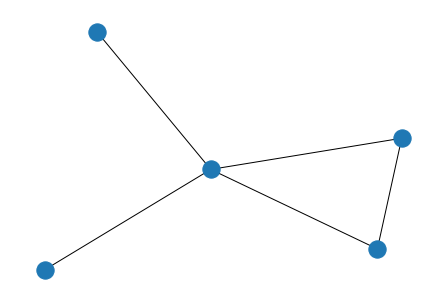

In [7]:
nx.draw(G)

In [8]:
#verification 

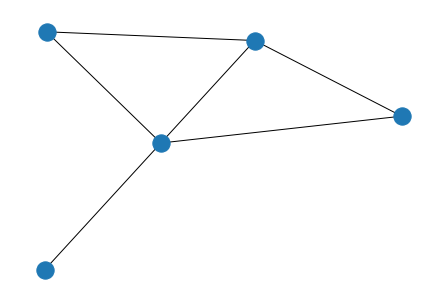

In [9]:
G1= nx.barabasi_albert_graph(5,2)
nx.draw(G1) # the above is a inbuilt function used here for the verification.

KEY POINTS TO BE NOTED HERE :-
  1) Here for the verification I have used inbuilt function which builds preferential attachment ,**You may observe graphs changing and may not get my implementation graph and inbuilt graph same. This is due to randomness of the algorithm and all are right.**
  2) If you want multiple times of output of execution you need to run from the cell where I have written reccursion logic to nx.draw(). You should not run directly nx.draw() cell.
  3) Since I used reccursion logic for larger values you may observe reccursion depth exceeded for that to handle you need to increase recurssion limit in the above.